DSCI 100 Project


Project Proposal Individual



In [18]:
library(tidyverse)
library(repr)
library(tidymodels)

In [19]:
players_url <- ("https://raw.githubusercontent.com/krt257/DsciProject/refs/heads/main/players.csv")
sessions_url <- ("https://raw.githubusercontent.com/krt257/DsciProject/refs/heads/main/sessions.csv")

players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)

# players_data
# sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
print("Players")
summary(players_data)
print("Sessions")
summary(sessions_data)

[1] "Players"


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

[1] "Sessions"


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [21]:
#Clear Duplicates


players_data <- players_data[!duplicated(players_data), ]
sessions_data <- sessions_data[!duplicated(sessions_data), ]

In [22]:
colnames(sessions_data)[colnames(sessions_data) == "Age"] <- "player_age"

In [23]:
print("Players")
summary(players_data)
print("Sessions")
summary(sessions_data)

[1] "Players"


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

[1] "Sessions"


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [24]:
#

Descriptive Summary of the Dataset:


There are a multitude of different variables distinctly present within this dataset we have. Firstly, I will take a look and analyze the "Players" dataset or csv file. They contain a multitude of different variables like experience, subscribe, hashedEmail, played_hours, name, gender, Age for Players. In Sessions, they have hashedEmail, start_time, end_time, original_end_time, original_start_time. 

There are some data issues :

    - Subscribe should be a boolean (TRUE/FALSE)
    
    - Some data may seem redundant.
    
    - There may be a skewed bias in the data inherently based on the way the data is collected, skewing to a younger demographic. However, there may also be issues such as people under 18 having possible restrictions in time allowed to be used playing games.










The question we want to ask?


What kinds of players are most likely to contribute a large amount of data.

    - This is important as this would allow us to understand which types of players or which demographics provide the most data, thus allowing researchers to allocate resources more effectively to maximize collection of data.

Specific Question?
Can we predict a rough guess of how much data a player can provide to us based on their experience, subscription status and session behaviour?

    - I believe for this, it would be best to clean up the data into mostly Experience, subscribe, and session_duration as our main variables or our independent variables to then allow us to look at this data and then use it to compare against the amount of data each of these user types provide to us. We can then plot it out using a scatterplot graph.

In [41]:
# Convert Unix timestamps properly
sessions_data$start_time <- as.POSIXct(sessions_data$start_time, origin = "1970-01-01", tz = "UTC")
sessions_data$end_time <- as.POSIXct(sessions_data$end_time, origin = "1970-01-01", tz = "UTC")

# Compute session duration for each session
sessions_data$session_duration <- as.numeric(difftime(sessions_data$end_time, sessions_data$start_time, units = "mins"))




mean_values <- players_sessions |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_total_sessions = mean(total_sessions, na.rm = TRUE),
    mean_avg_session_duration = mean(avg_session_duration, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)
  )

print(mean_values)

  mean_age mean_total_sessions mean_avg_session_duration mean_played_hours
1 20.52062               12.28                  7114.731          5.845918


In [46]:
sessions_summary <- sessions_data |>
  group_by(hashedEmail) |>
  summarise(
    total_sessions = n(),  
    avg_session_duration = mean(session_duration, na.rm = TRUE)  
  )


# Merge with players dataset
players_sessions <- merge(players_data, sessions_summary, by = "hashedEmail", all.x = TRUE)
players_sessions

hashedEmail,experience,subscribe,played_hours,name,gender,Age,total_sessions,avg_session_duration
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2,262800.00
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,1,0.00
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,1,0.00
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,13,0.00
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,TRUE,1.0,Knox,Male,17,2,0.00
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,FALSE,0.1,Callum,Male,19,1,0.00
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,TRUE,0.7,Hugo,Female,21,1,0.00
11bf6125c4264b3a8f3bffa57b33bd598e2ea1ecd6331ad3bc54aa88e22db035,Amateur,FALSE,0.0,Olivia,Female,23,NA,NA


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


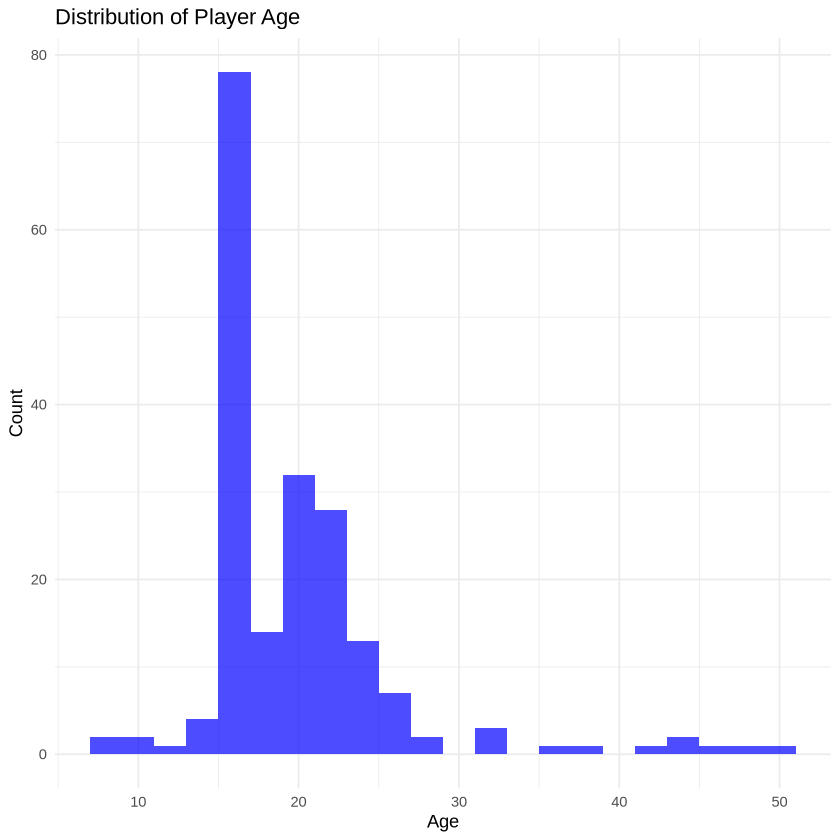

In [47]:
ggplot(players_sessions, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Player Age", x = "Age", y = "Count") +
  theme_minimal()

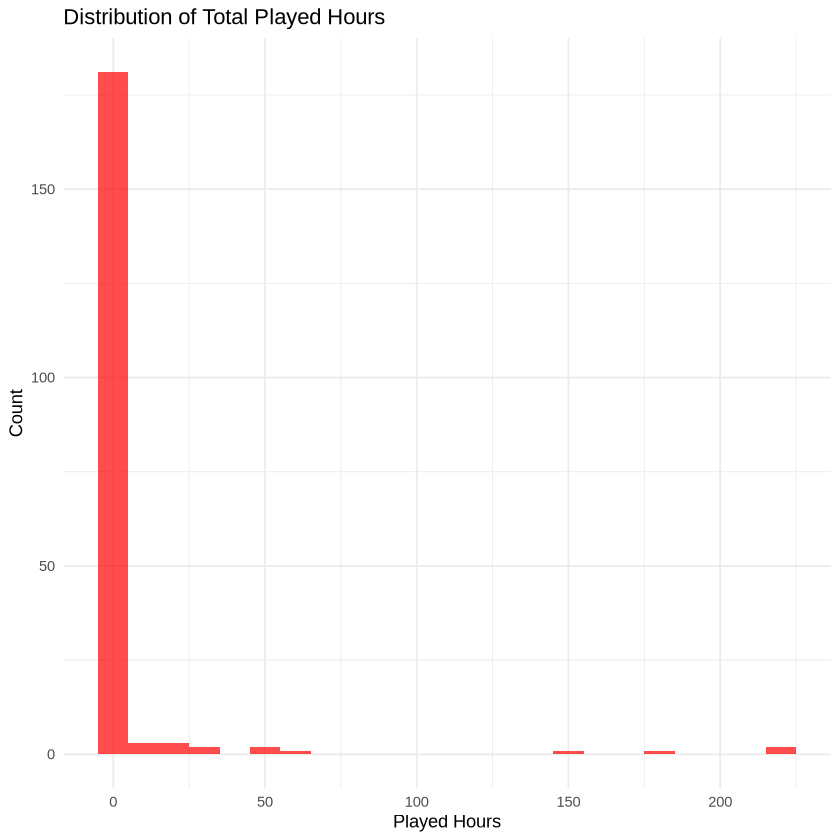

In [48]:
ggplot(players_sessions, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "red", alpha = 0.7) +
  labs(title = "Distribution of Total Played Hours", x = "Played Hours", y = "Count") +
  theme_minimal()

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


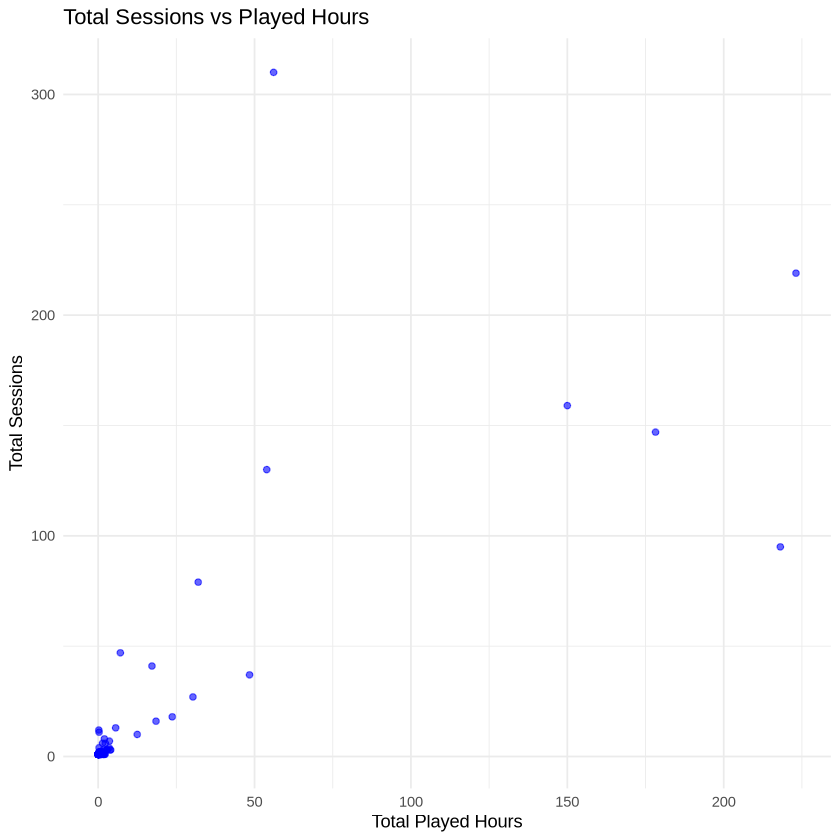

In [50]:
ggplot(players_sessions, aes(x = played_hours, y = total_sessions)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(title = "Total Sessions vs Played Hours", x = "Total Played Hours", y = "Total Sessions") +
  theme_minimal()


From these base analysis, we can identify that it is mostly people in their late teens or early 20's who comprise our data. Furthermore, it seems as if the total amount of sessions and total played hours have a  weak correlation.

Methods

The method I would try first here would be using linear regression as this approach would allow us to work with our result based on a 0 to 1 or 0 to 10 scale, with a relative strength index essentially indicating how much data we expect.

Why is this method appropriate?

    - This allows us to make relatively accurate predictions and also to see which variables may affect each category the most.
Which assumptions are required

    - We have to assume that the contribtuon scale / our strength scale works linearly with the predictors.
What are the potential limitations

    - Linearity may not always hold all the time and the other large issue with it is that it is not super robust against outliers unlike KNN.
How are you going to compare and select the model?

    - We will use mean squared or root mean squared error and standard deviations to identify the difference / ranges to the real values.
How are you going to process the data to apply the model? 

    -  I will use a 70 / 30 Training / Testing split. I believe I will use cross validation to ensure and to also attempt to prevent overfitting.